
# 项目：探索调查未前往就诊的挂号预约数据集

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

>本数据集包含10万条巴西预约挂号的求诊信息，包含了关于患者特点的数据，研究病人是否如约前往医院就诊。其中，“预约日期 (ScheduledDay)”指患者具体预约就诊的日期；“街区 (Neighborhood) ”指医院所在位置；“福利保障 (Scholarship)”说明病人是否是巴西福利项目 Bolsa Família 的保障人群；请注意最后一列内容的编码：“No”表示病人已如约就诊，“Yes”说明病人未前往就诊。

>本文将研究有哪些重要因素能够帮助我们预测患者是否会按照其挂号预约前往医院就诊？主要会从患者的性别，年龄，福利保障这三点进行研究。


In [101]:
# 导入相关包
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
% matplotlib inline 


<a id='wrangling'></a>
## 数据整理

### 常规属性
>对数据集中的数据类型，是否有缺失值或异常值，是否有重复进行如下评估。

In [102]:
# 加载数据并打印几行。进行几项操作，检查数据
#   类型，以及是否有缺失数据或错误数据。
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [103]:
# 查看数据集行数列数
df.shape

(110527, 14)

In [104]:
# 检查数据类型
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [105]:
# 查看是否有缺失数据
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [106]:
# 了解数据大致情况
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [107]:
# 检查是否有重复数据
sum(df.duplicated())

0

In [108]:
# 检查数据集中性别列是否有错误值
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [109]:
# 检查年龄为-1的数量
df[df['Age']== -1]['Age'].count()

1

In [110]:
# 检查数据集中福利保障列是否有错误值
df['Scholarship'].unique()

array([0, 1])

In [111]:
# 将其保存，供稍后使用
df.to_csv('noshowappointments_2016.csv', index=False)

>**说明：**通过以上对数据集的探索，得出该数据集有110527行14列。无缺失数据，无重复数据行。数据集存在如下的问题：
1、数据类型错误：ScheduledDay和AppointmentDay类型为字符类型，应该更改为时间类型；数据集中的‘No-show’取值为Yes或No，为字符型，为方便后续直接对其进行运算，将其转换为布尔型。
3、存在异常数据：年龄列有一个-1值，由于数据样本充足，因此删除该值对应的样本。

>下面，对数据集进行相应的清理。


### 数据清理-修改错误数据类型及异常数据

In [112]:
# 加载保存的数据
df_clean = pd.read_csv('noshowappointments_2016.csv')

1、**修改‘ScheduledDay’‘AppointmentDay’类型为时间类型**

In [113]:
df_clean['ScheduledDay'] = pd.to_datetime(df_clean['ScheduledDay'])
df_clean['AppointmentDay'] = pd.to_datetime(df_clean['AppointmentDay'])

**2、修改数据集中的‘No-show’取值为Yes或No为布尔型**

In [114]:
# 类型转换成布尔型
df_clean['No-show'] = df_clean['No-show'].map({'Yes': True, 'No': False})

In [115]:
# 检查数据类型
df_clean.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                     bool
dtype: object

**3、删除年龄列中错误的样本**

In [116]:
# 找到年龄为-1的数据
df_clean[df_clean['Age']== -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,False


In [117]:
# 删除错误年龄样本
df_clean.drop([99832],inplace=True) 

In [118]:
# 检查年龄为-1的数据是否删除
df_clean[df_clean['Age']== -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


**4、‘ScheduledDay’‘AppointmentDay’两列已经更改为时间类型，增加一列差异时间,检查下就诊日是否会在预约日之前的的异常数据**

In [119]:
df_clean['Time_difference'] =df_clean['AppointmentDay']-df_clean['ScheduledDay']

In [120]:
# 查看数据集部分样本
df_clean.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Time_difference
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,False,34 days 14:44:25
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,False,34 days 16:32:27
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,False,40 days 07:56:08
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,False,40 days 08:50:37
110526,3.775115e+14,5629448,F,2016-04-27 13:30:56,2016-06-07,54,MARIA ORTIZ,0,0,0,0,0,1,False,40 days 10:29:04


**5、由于后续将对年龄进行分析，在此增加一列年龄分组**

In [121]:
# 对年龄进行分组，每十岁为一组。由于90岁以上的人数少，暂时不考虑大于90岁的人群。
bins = np.arange(0,100,10)
# 添加分组字段
df_clean['Age_group'] = pd.cut(df_clean['Age'],bins)

In [122]:
df_clean.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Time_difference,Age_group
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,False,-1 days +05:21:52,"(60, 70]"
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,False,-1 days +07:51:33,"(50, 60]"
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,False,-1 days +07:40:56,"(60, 70]"
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,False,-1 days +06:30:29,"(0, 10]"
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,False,-1 days +07:52:37,"(50, 60]"


In [123]:
# 将其保存，供稍后使用
df_clean.to_csv('noshowappointments_2016.csv', index=False)

In [124]:
# 查看数据的行列
df_clean.shape

(110526, 16)

<a id='eda'></a>
## 探索性数据分析

**首先，定义函数对各个因素的数量及失约率进行统计，方便后续得出相关数据。**

In [125]:
# 定义计数绘图函数
def count_bar(factor):
    '''
    传入一个因素的列名，打印出该因素下的失约与未失约人数
    并绘制出组合柱状图
    '''
    count_data = df_clean.groupby([factor, 'No-show'])['PatientId'].count()
    print(count_data)
    count_data.unstack().plot(kind='bar', stacked=False)
    plt.title('Count of patients across {} and No-show'.format(factor))
    plt.ylabel('Quantity');

In [126]:
# 定义失约比例绘图函数
def ration_bar(factor):
    '''
    传入一个因素的列名，打印出该因素下的失约比例
    并绘制出柱状图
    '''
    no_show_ration = df_clean.groupby(factor)['No-show'].mean()
    print(no_show_ration)
    no_show_ration.plot(kind='bar')
    plt.title('Ration Of No-Show VS {}'.format(factor))
    plt.ylabel('Ration Of No-Show');

**其次，使用饼图探索一下总体的失约情况。作为后面对各个群体失约率作为参考**

In [127]:
# 获取如约就诊和未去就诊的数量
No_show_count = df_clean.groupby('No-show')['No-show'].count()
No_show_count

No-show
False    88207
True     22319
Name: No-show, dtype: int64

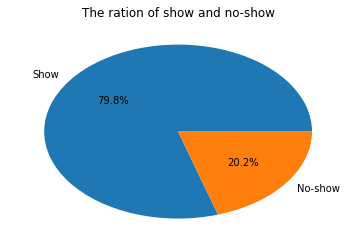

In [128]:
# 绘制总体的如约和失约比例饼状图
plt.pie(No_show_count,labels=['Show','No-show'],autopct='%.1f%%')
plt.title('The ration of show and no-show');

> 对总体如约就诊和未去就诊的数据进行分析，得出如约就诊的比例是79.8%，未去就诊的失约比例为20.2%。后续将会对各个变量与总体失约比例进行探讨。如下：对性别、年龄段、是否有福利保障探索其失约率。


### 研究问题 1  患者的性别是影响患者是否会按照其挂号预约前往医院就诊的因素吗？

为了探究患者性别是否与患者是否就诊有关，首先采取是否就诊中男女数量的进行比较。

**第一步：获取不同性别如约就诊和未去就诊的数量,绘制其柱形图**

Gender  No-show
F       False      57245
        True       14594
M       False      30962
        True        7725
Name: PatientId, dtype: int64


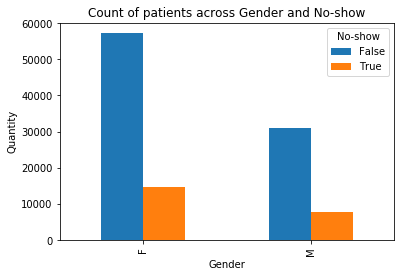

In [129]:
# 获取不同性别是否前往就诊的数量并绘制柱形图
count_bar('Gender')

>由数据和柱形图看，无论男女如约就诊的人数都超过了未去就诊的；女生是否就诊的数量都超过了男生是否就诊的数量，由于女生的样本数多于男生的样本数，下面通过比例查看男女性别比例是否会影响就诊。

**第二步：绘制性别失约比例柱形图**

为了观察性别是否与如约就诊和未去就诊有关系，现对性别失约比例进行探索，得出数据并绘制行性别失约比例柱形图。

Gender
F    0.203149
M    0.199679
Name: No-show, dtype: float64


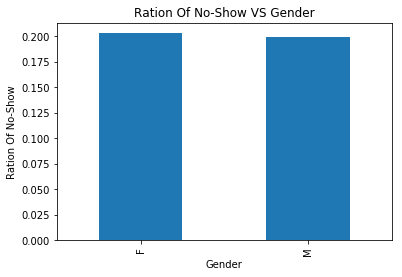

In [130]:
# 获取性别失约比例并绘制柱形图
ration_bar('Gender')

>通过以上如约就诊和未去就诊中男女比例的数据，可以看出及时性别失约比例分别是：女性：0.2，男性：0.2。所占比例基本相同，失约比例略低于总体失约比例。因此从男女性别比例无法看出如约就诊和未去就诊是否与性别有关。

>下面通过对如约就诊和未去就诊的年龄分布进行分析，查看如约就诊和未去就诊的年龄特点是如何的。

### 研究问题 2  是否会按照其挂号预约前往医院就诊的患者年龄分布

**第一步：查看年龄分组分布，首先获取如约就诊和未去就诊年龄分组分布数据**

获取年龄分组数据，绘制其柱形图

Age_group  No-show
(0, 10]    False      12061
           True        3149
(10, 20]   False       9791
           True        3308
(20, 30]   False      10389
           True        3394
(30, 40]   False      11820
           True        3232
(40, 50]   False      11550
           True        2870
(50, 60]   False      12940
           True        2721
(60, 70]   False       9541
           True        1648
(70, 80]   False       4832
           True         889
(80, 90]   False       2137
           True         407
Name: PatientId, dtype: int64


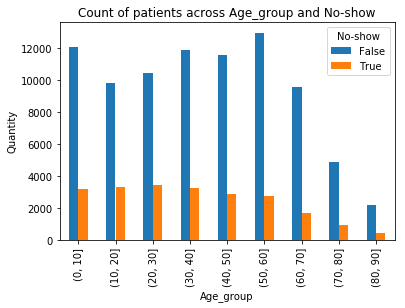

In [131]:
# 获取不同年龄段如约就诊和未去就诊的数据，绘制柱形图
count_bar('Age_group')

>从以上数据及图表看出如约就诊的人数远远大于未去就诊的人数。如约就诊的患者年龄主要分布0-10,50-60岁的范围，未去就诊的年龄分布主要分布在10-20,20-30岁的范围。大于80岁的如约就诊和未去就诊的人数都比较少。为了进一步探究年龄的问题，下面对年龄分组失约比例进行探索。

**第二步：对不同年龄段失约比例进行探索，查看年龄是否与其是否失约有关**

获取不同年龄段失约比例并绘制柱形图

Age_group
(0, 10]     0.207035
(10, 20]    0.252538
(20, 30]    0.246245
(30, 40]    0.214722
(40, 50]    0.199029
(50, 60]    0.173744
(60, 70]    0.147288
(70, 80]    0.155392
(80, 90]    0.159984
Name: No-show, dtype: float64


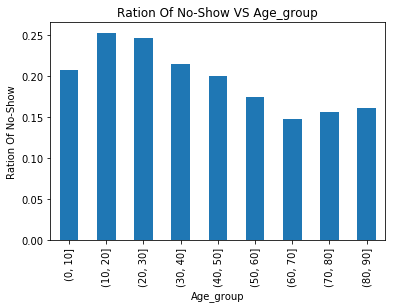

In [132]:
ration_bar('Age_group')

> 由以上数据可以看出，失约率前三的年龄段主要分布在：10-20岁，20-30岁，30-40岁，失约率均高于总体的失约率。60-70岁的人群失约率最低。因此，年龄对患者是否会按照其挂号预约前往医院就诊有一定的影响。

**第三步：使用箱线图来对比失约人群与未失约人群的年龄分布情况**

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


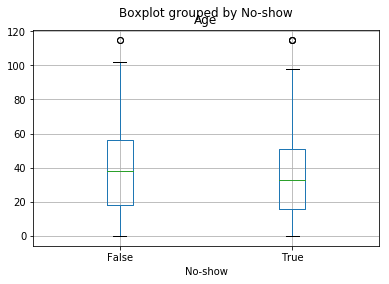

In [133]:
df_clean.boxplot(column='Age',by='No-show',showfliers=True);

>通过以上数据得到，未去就诊的患者的年龄稍微年轻些。年龄对于患者是否依据其挂号预约前往是有影响的。

>为了进一步哪些因素与研究患者是否会按照其挂号预约前往医院就诊有关系，下面对患者是否有福利保障进行探索。

### 研究问题 3    福利保障是否与患者是否会按照其挂号预约前往医院就诊有关系

**第一步：探索是否有福利保障与患者是否如约就诊的人数分布的情况。**

Scholarship  No-show
0            False      79924
             True       19741
1            False       8283
             True        2578
Name: PatientId, dtype: int64


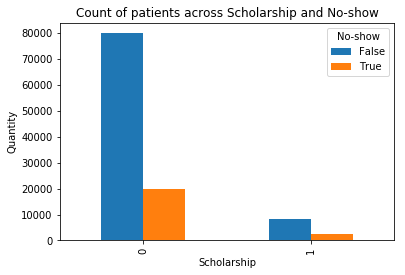

In [134]:
count_bar('Scholarship')

>由以上数据探索得出，福利保障为0的人数多于福利保障为1的人数。其中福利保障为0的如约就诊和未去就诊人数均高于福利保障为1的患者。为了进一步探索福利保障能否影响患者是否如约就诊，下面对福利保障进行失约比例进行探索。

**第二步：探索福利保障的失约就诊比例**

Scholarship
0    0.198074
1    0.237363
Name: No-show, dtype: float64


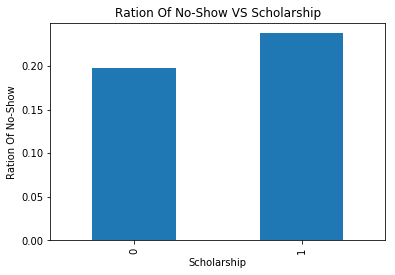

In [135]:
ration_bar('Scholarship')

>由以上数据及图表探索得出，福利保障为1的患者失约率高于福利保障为0的患者失约率，失约比例高于总体失约比例0.20。由此可知，是否有保障对患者是否如约就诊是有影响。

<a id='conclusions'></a>
## 结论

> 本报告在处理数据集时，存在有数据类型错误，数据值异常。对其进行修改为正确的数据类型，对于数据值异常的年龄，由于样本数充足，将其进行了删除。其中整理就诊日期是否会在预约日期时，增加了一列时间差异列，可以通过时间差异列进行分组探讨其相关性。为了对年龄进行探索将其年龄分组，探索不同年龄段的失约率。

>综上所述，通过对性别，年龄，福利保障与患者是否如约就诊进行探索。可以得出性别与患者是否会按照其挂号预约前往医院就诊影响不大，年龄在10-20岁的患者容易失约就诊，福利保障为1的失约比例高，对其是否如约就诊有关系。因此，年龄和福利保障能够帮助我们预测患者是否会按照其挂号预约前往医院就诊。

>本报告主要探索了性别，年龄分布，是否有福利保障这三个因素与患者是否会按照其挂号预约前往医院就诊的关系。这些只是一部分，并不能完全代表结果，还可以从是否收到短信通知、就诊时间和预约时间的时间差和缺席率的相关性进行探究，观察这些因素能否帮助我们预测患者是否会按照其挂号预约前往医院就诊。


In [137]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255